In [95]:
import torch
import torch.nn as nn

In [79]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return corr2d(x, self.weight) + self.bias

In [80]:
def corr2d(X, K):  #@save
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

In [81]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [82]:
K = torch.tensor([[1.0, -1.0]])

In [83]:
Y = corr2d(X, K)

In [84]:
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [125]:
Y.squeeze().shape

torch.Size([6, 7])

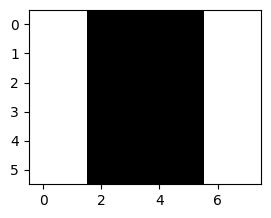

In [137]:
plt.figure(figsize=(3,3))
plt.imshow(X.squeeze(), cmap='gray')

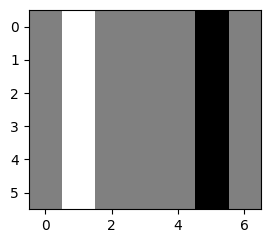

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.imshow(Y.squeeze(), cmap='gray')

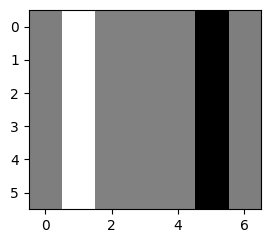

In [140]:
plt.figure(figsize=(3,3))
plt.imshow(Y_hat.detach().numpy().squeeze(), cmap='gray')

In [131]:
# Construct a two-dimensional convolutional layer with 1 output channel and a
# kernel of shape (1, 2). For the sake of simplicity, we ignore the bias here
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

# The two-dimensional convolutional layer uses four-dimensional input and
# output in the format of (example, channel, height, width), where the batch
# size (number of examples in the batch) and the number of channels are both 1
X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))
lr = 3e-2  # Learning rate

for i in range(10):
    Y_hat = conv2d(X)
    #print('X')
    #print(X)

    
    #print('forward')
    #print(Y_hat)
    l = (Y_hat - Y) ** 2
    
    #print('loss')
    #print(l)
    conv2d.zero_grad()
    l.sum().backward()
    # Update the kernel
    conv2d.weight.data[:] -= lr * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(f'epoch {i + 1}, loss {l.sum():.3f}')
        
        
conv2d.weight.data.reshape((1, 2))

epoch 2, loss 8.520
epoch 4, loss 1.480
epoch 6, loss 0.269
epoch 8, loss 0.054
epoch 10, loss 0.012


/Users/dav/dev/doml/mlenv/lib/python3.11/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


tensor([[ 0.9929, -0.9771]])

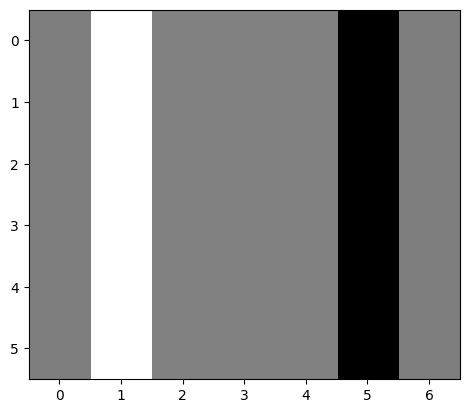

In [135]:
plt.imshow(Y_hat.detach().numpy().squeeze(), cmap='gray')

In [99]:
(torch.tensor([1,-1]) * torch.tensor([1,1])).sum()

tensor(0)